In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')
from colossus.halo import concentration, mass_defs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
sz_ft = 20
sz_lb = 14
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from tqdm import tqdm
import cosmo
import lensing_estimator
from cosmo import CosmoCalc
import lensing
import foregrounds as fg
import experiments as exp
import sims
import stats
import tools

In [2]:
nber_clus = 3000
nber_rand = 50000
nber_runs = 50
map_params = [180, 0.5, 180, 0.5]
l, cl = CosmoCalc().cmb_power_spectrum()
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.0)
noiseval_arr = [0.1, 0.25, 0.5, 1, 2, 3, 5]
nl_arr = []
cl_noise_arr = []
for noiseval in noiseval_arr:
    l, nl = exp.white_noise_power_spectrum(noiseval_white = noiseval)
    l, nl_deconvolved =exp.white_noise_power_spectrum(noiseval_white = noiseval, beam_fwhm = 1.0)
    nl_arr.append(nl)
    cl_noise_arr.append(nl_deconvolved)
nber_clus_fit = 30000
nber_rand_fit = 30000
z = 0.7

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


In [3]:
cluster_2e14 = [2e14, cosmo.concentration_parameter(2e14, 0.7, 0.674), 0.7]
cluster_arr = [cluster_2e14]
mass_int = np.arange(0, 4, 0.1)

In [4]:
stack_bg = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_50000rand_0.1uK-arcmin_500vs1000.npy')   
covariance_matrix_500 = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_3000clus_0.1uK-arcmin_500.npy') 
covariance_matrix_1000 = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_3000clus_0.1uK-arcmin_1000.npy') 
model_profiles = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_0.1uK-arcmin_500vs1000.npy')  

lk_arr_2e14_500_1 = []      
lk_arr_2e14_1000_1 = []     
for i in tqdm(range(nber_runs)):  
    maps_clus = sims.cmb_test_data(map_params, l, cl, cluster = cluster_arr, bl = bl, nl = nl_arr[0], nber_obs = nber_clus, estimator_validation = True)
    maps_clus_2e14 = maps_clus[0]
    stack_clus_2e14 = lensing_estimator.stack(map_params, maps_clus_2e14, l = l, cl = cl, cl_noise = cl_noise_arr[0])
    bins_2e14, lensing_dipole_profile_2e14, stack_dipole_2e14 = lensing_estimator.lensing_dipole(map_params, stack_clus_2e14, stack_bg)
   
    data_2e14_500 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_500
    data_2e14_1000 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_1000

    likelihood_2e14_500, _, _ = stats.run_ml(data_2e14_500, model_profiles, mass_int)
    mass_int_lk_2e14_500, lk_2e14_500 = likelihood_2e14_500
  
    likelihood_2e14_1000, _, _ = stats.run_ml(data_2e14_1000, model_profiles, mass_int)
    mass_int_lk_2e14_1000, lk_2e14_1000 = likelihood_2e14_1000

    lk_arr_2e14_500_1.append(lk_2e14_500)
    lk_arr_2e14_1000_1.append(lk_2e14_1000)

    del maps_clus
    del maps_clus_2e14



lk_arr_estimator_validation_500_1 = [lk_arr_2e14_500_1]
comb_lk_2e14_500_1, mass_value_comb_lk_2e14_500_1, error_comb_lk_2e14_500_1 = stats.combined_likelihood(mass_int_lk_2e14_500, lk_arr_2e14_500_1)      
comb_lk_arr_estimator_validation_500_1 = [comb_lk_2e14_500_1]
lk_arr_estimator_validation_1000_1 = [lk_arr_2e14_1000_1]
comb_lk_2e14_1000_1, mass_value_comb_lk_2e14_1000_1, error_comb_lk_2e14_1000_1 = stats.combined_likelihood(mass_int_lk_2e14_1000, lk_arr_2e14_1000_1)      
comb_lk_arr_estimator_validation_1000_1 = [comb_lk_2e14_1000_1]

  0%|          | 0/25 [00:00<?, ?it/s]/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2
100%|██████████| 25/25 [30:34<00:00, 73.37s/it]


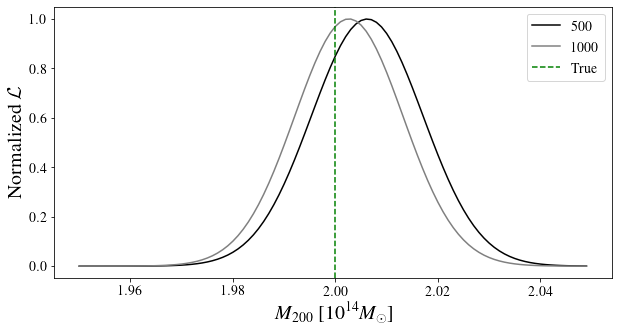

In [5]:
fig, ax1 = plt.subplots(figsize=(10,5))

#for i in range(nber_runs):
#    ax1.plot(mass_int_lk_2e14_500[1000:3000], lk_arr_estimator_validation_500[0][i][1000:3000], color = 'red', ls='-', alpha = 0.1)
#    ax1.plot(mass_int_lk_2e14_1000[1000:3000], lk_arr_estimator_validation_1000[0][i][1000:3000], color = 'blue', ls='-', alpha = 0.1)
ax1.plot(mass_int_lk_2e14_500[1950:2050], comb_lk_arr_estimator_validation_500_1[0][1950:2050], color = 'black', ls = '-', label = '500')
ax1.plot(mass_int_lk_2e14_1000[1950:2050], comb_lk_arr_estimator_validation_1000_1[0][1950:2050], color = 'grey', ls = '-', label = '1000')
ax1.tick_params(labelsize = sz_lb)
ax1.axvline(2, color = 'green', ls = '--', label = 'True') 
ax1.set_xlabel(r'$M_{200}\ [10^{14}M_\odot]$', fontsize = sz_ft)   
ax1.set_ylabel('Normalized '+r'$\mathcal{L}$', fontsize = sz_ft)
ax1.legend(prop={'size': sz_lb}) 

In [6]:
print(mass_value_comb_lk_2e14_500_1, error_comb_lk_2e14_500_1)
print(mass_value_comb_lk_2e14_1000_1, error_comb_lk_2e14_1000_1)

2.0062110757418172 0.010858894719071754
2.002641318929002 0.010514447728198317


In [7]:
cluster_2e14 = [2e14, cosmo.concentration_parameter(2e14, 0.7, 0.674), 0.7]
cluster_arr = [cluster_2e14]
mass_int = np.arange(0, 4, 0.1)

In [8]:
stack_bg = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_50000rand_2uK-arcmin_500vs1000.npy')   
covariance_matrix_500 = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_3000clus_2uK-arcmin_500.npy') 
covariance_matrix_1000 = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_3000clus_2uK-arcmin_1000.npy') 
model_profiles = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_2uK-arcmin_500vs1000.npy')  

lk_arr_2e14_500_2 = []      
lk_arr_2e14_1000_2 = []     
for i in tqdm(range(nber_runs)):  
    maps_clus = sims.cmb_test_data(map_params, l, cl, cluster = cluster_arr, bl = bl, nl = nl_arr[4], nber_obs = nber_clus, estimator_validation = True)
    maps_clus_2e14 = maps_clus[0]
    stack_clus_2e14 = lensing_estimator.stack(map_params, maps_clus_2e14, l = l, cl = cl, cl_noise = cl_noise_arr[4])
    bins_2e14, lensing_dipole_profile_2e14, stack_dipole_2e14 = lensing_estimator.lensing_dipole(map_params, stack_clus_2e14, stack_bg)
   
    data_2e14_500 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_500
    data_2e14_1000 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_1000

    likelihood_2e14_500, _, _ = stats.run_ml(data_2e14_500, model_profiles, mass_int)
    mass_int_lk_2e14_500, lk_2e14_500 = likelihood_2e14_500
  
    likelihood_2e14_1000, _, _ = stats.run_ml(data_2e14_1000, model_profiles, mass_int)
    mass_int_lk_2e14_1000, lk_2e14_1000 = likelihood_2e14_1000

    lk_arr_2e14_500_2.append(lk_2e14_500)
    lk_arr_2e14_1000_2.append(lk_2e14_1000)

    del maps_clus
    del maps_clus_2e14



lk_arr_estimator_validation_500_2 = [lk_arr_2e14_500_2]
comb_lk_2e14_500_2, mass_value_comb_lk_2e14_500_2, error_comb_lk_2e14_500_2 = stats.combined_likelihood(mass_int_lk_2e14_500, lk_arr_2e14_500_2)      
comb_lk_arr_estimator_validation_500_2 = [comb_lk_2e14_500_2]
lk_arr_estimator_validation_1000_2 = [lk_arr_2e14_1000_2]
comb_lk_2e14_1000_2, mass_value_comb_lk_2e14_1000_2, error_comb_lk_2e14_1000_2 = stats.combined_likelihood(mass_int_lk_2e14_1000, lk_arr_2e14_1000_2)      
comb_lk_arr_estimator_validation_1000_2 = [comb_lk_2e14_1000_2]

  0%|          | 0/25 [00:00<?, ?it/s]/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2
100%|██████████| 25/25 [30:28<00:00, 73.14s/it]


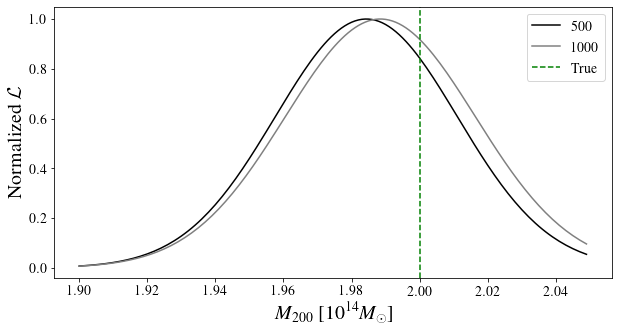

In [9]:
fig, ax1 = plt.subplots(figsize=(10,5))

#for i in range(nber_runs):
#    ax1.plot(mass_int_lk_2e14_500[1000:3000], lk_arr_estimator_validation_500[0][i][1000:3000], color = 'red', ls='-', alpha = 0.1)
#    ax1.plot(mass_int_lk_2e14_1000[1000:3000], lk_arr_estimator_validation_1000[0][i][1000:3000], color = 'blue', ls='-', alpha = 0.1)
ax1.plot(mass_int_lk_2e14_500[1900:2050], comb_lk_arr_estimator_validation_500_2[0][1900:2050], color = 'black', ls = '-', label = '500')
ax1.plot(mass_int_lk_2e14_1000[1900:2050], comb_lk_arr_estimator_validation_1000_2[0][1900:2050], color = 'grey', ls = '-', label = '1000')
ax1.tick_params(labelsize = sz_lb)
ax1.axvline(2, color = 'green', ls = '--', label = 'True') 
ax1.set_xlabel(r'$M_{200}\ [10^{14}M_\odot]$', fontsize = sz_ft)   
ax1.set_ylabel('Normalized '+r'$\mathcal{L}$', fontsize = sz_ft)
ax1.legend(prop={'size': sz_lb}) 

In [10]:
print(mass_value_comb_lk_2e14_500_2, error_comb_lk_2e14_500_2)
print(mass_value_comb_lk_2e14_1000_2, error_comb_lk_2e14_1000_2)

1.9843335602524057 0.026588011134412226
1.988545726332855 0.027779273002158877


In [11]:
cluster_2e14 = [2e14, cosmo.concentration_parameter(2e14, 0.7, 0.674), 0.7]
cluster_arr = [cluster_2e14]
mass_int = np.arange(0, 4, 0.1)

In [12]:
stack_bg = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_50000rand_5uK-arcmin_500vs1000.npy')   
covariance_matrix_500 = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_3000clus_5uK-arcmin_500.npy') 
covariance_matrix_1000 = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_3000clus_5uK-arcmin_1000.npy') 
model_profiles = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_5uK-arcmin_500vs1000.npy')  

lk_arr_2e14_500_3 = []      
lk_arr_2e14_1000_3 = []     
for i in tqdm(range(nber_runs)):  
    maps_clus = sims.cmb_test_data(map_params, l, cl, cluster = cluster_arr, bl = bl, nl = nl_arr[6], nber_obs = nber_clus, estimator_validation = True)
    maps_clus_2e14 = maps_clus[0]
    stack_clus_2e14 = lensing_estimator.stack(map_params, maps_clus_2e14, l = l, cl = cl, cl_noise = cl_noise_arr[6])
    bins_2e14, lensing_dipole_profile_2e14, stack_dipole_2e14 = lensing_estimator.lensing_dipole(map_params, stack_clus_2e14, stack_bg)
   
    data_2e14_500 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_500
    data_2e14_1000 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_1000

    likelihood_2e14_500, _, _ = stats.run_ml(data_2e14_500, model_profiles, mass_int)
    mass_int_lk_2e14_500, lk_2e14_500 = likelihood_2e14_500
  
    likelihood_2e14_1000, _, _ = stats.run_ml(data_2e14_1000, model_profiles, mass_int)
    mass_int_lk_2e14_1000, lk_2e14_1000 = likelihood_2e14_1000

    lk_arr_2e14_500_3.append(lk_2e14_500)
    lk_arr_2e14_1000_3.append(lk_2e14_1000)

    del maps_clus
    del maps_clus_2e14



lk_arr_estimator_validation_500_3 = [lk_arr_2e14_500_3]
comb_lk_2e14_500_3, mass_value_comb_lk_2e14_500_3, error_comb_lk_2e14_500_3 = stats.combined_likelihood(mass_int_lk_2e14_500, lk_arr_2e14_500_3)      
comb_lk_arr_estimator_validation_500_3 = [comb_lk_2e14_500_3]
lk_arr_estimator_validation_1000_3 = [lk_arr_2e14_1000_3]
comb_lk_2e14_1000_3, mass_value_comb_lk_2e14_1000_3, error_comb_lk_2e14_1000_3 = stats.combined_likelihood(mass_int_lk_2e14_1000, lk_arr_2e14_1000_3)      
comb_lk_arr_estimator_validation_1000_3 = [comb_lk_2e14_1000_3]

  0%|          | 0/25 [00:00<?, ?it/s]/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2
100%|██████████| 25/25 [30:10<00:00, 72.44s/it]


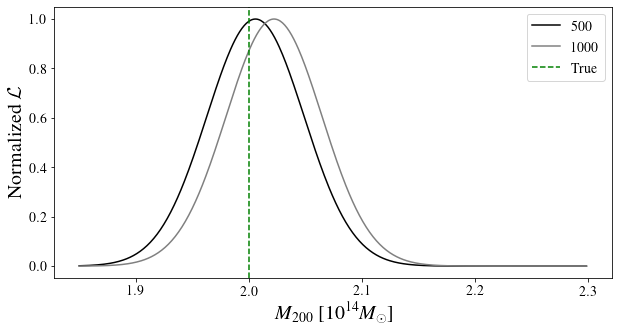

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))

#for i in range(nber_runs):
#    ax1.plot(mass_int_lk_2e14_500[1000:3000], lk_arr_estimator_validation_500[0][i][1000:3000], color = 'red', ls='-', alpha = 0.1)
#    ax1.plot(mass_int_lk_2e14_1000[1000:3000], lk_arr_estimator_validation_1000[0][i][1000:3000], color = 'blue', ls='-', alpha = 0.1)
ax1.plot(mass_int_lk_2e14_500[1850:2300], comb_lk_arr_estimator_validation_500_3[0][1850:2300], color = 'black', ls = '-', label = '500')
ax1.plot(mass_int_lk_2e14_1000[1850:2300], comb_lk_arr_estimator_validation_1000_3[0][1850:2300], color = 'grey', ls = '-', label = '1000')
ax1.tick_params(labelsize = sz_lb)
ax1.axvline(2, color = 'green', ls = '--', label = 'True') 
ax1.set_xlabel(r'$M_{200}\ [10^{14}M_\odot]$', fontsize = sz_ft)   
ax1.set_ylabel('Normalized '+r'$\mathcal{L}$', fontsize = sz_ft)
ax1.legend(prop={'size': sz_lb}) 

In [14]:
print(mass_value_comb_lk_2e14_500_3, error_comb_lk_2e14_500_3)
print(mass_value_comb_lk_2e14_1000_3, error_comb_lk_2e14_1000_3)

2.0058839531429387 0.042848342356881286
2.0224388695644326 0.04221978990686115
